# Navigating the Skies: Analyzing Flight Delay Trends in the US

#### A Data-Driven Approach to Analyzing and predicting Flight Delays Across US Airports

## Introduction

 In this project, we will be exploring a comprehensive dataset of airline flights from 2015 to predict the likelihood of delays. Flight delays can be frustrating for passengers and costly for airlines, and we hope to use our data analysis skills to provide insights into the factors that contribute to delays and develop a predictive model to help airlines proactively mitigate the impact of delays. By analyzing historical data on flight delays, we hope to identify patterns and correlations that can inform our predictive model and ultimately improve the overall efficiency and reliability of air travel.

 We will try to answer the following questions to guide us through the project:

- Which airports have the highest percentage of delayed flights?
- What is the average duration of flight delays?
- Are there certain times of day, days of the week, or months of the year when delays are more common?
- What is the impact of weather, air traffic control, and other external factors on flight delays?
- How do different types of delays (e.g. late aircraft, airline-related delays, weather-related delays) affect the overall on-time performance of airlines?
- Are there opportunities for airlines to improve their operations and reduce delays, and if so, what specific strategies should they pursue?

## Data Analysis

Importing Libraries and Data

In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import random

In [3]:
data_origin = pd.read_csv('flights.csv', low_memory=False)
data = data_origin.copy()

Exploring the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [7]:
#Making a copy of the raw data
flights = data.copy()
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1451127,2015,4,3,5,AS,616,N319AS,SEA,LAS,1850,...,2115.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
918084,2015,3,2,1,DL,1239,N927DN,DCA,ATL,900,...,1100.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5702191,2015,12,24,4,UA,1167,N808UA,CLE,IAH,815,...,1017.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3973588,2015,9,4,5,DL,2853,N896AT,ATL,TUL,828,...,923.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3199153,2015,7,19,7,DL,1503,N901DE,LGA,MSP,1625,...,1822.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356866,2015,9,29,2,AA,790,N940UW,MCO,CLT,835,...,1004.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5446365,2015,12,7,1,EV,4218,N21154,ORD,LEX,2050,...,2258.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5529335,2015,12,13,7,MQ,3639,N647MQ,ORD,FWA,1204,...,1351.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2507610,2015,6,8,1,DL,2513,N991AT,ATL,VPS,1055,...,1112.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,50000.0,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,49224.000000,49224.000000,49199.000000,49199.000000,...,50000.000000,49169.000000,49038.000000,50000.000000,50000.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,2015.0,6.492960,15.803640,3.94064,2170.722820,1328.963220,1334.771636,9.294511,16.076302,1356.036363,...,1490.500100,1472.595070,4.258901,0.003020,0.016220,13.523454,0.098649,18.580688,23.121828,3.070526
std,0.0,3.408323,8.783338,1.99386,1752.242328,483.853658,496.065172,36.189061,8.854741,497.914751,...,508.558227,527.690805,38.501332,0.054872,0.126322,27.687399,3.092037,45.206337,42.467124,20.741073
min,2015.0,1.000000,1.000000,1.00000,1.000000,5.000000,1.000000,-35.000000,1.000000,1.000000,...,1.000000,1.000000,-73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000,8.000000,2.00000,730.000000,916.000000,920.000000,-5.000000,11.000000,935.000000,...,1110.000000,1058.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,6.000000,16.000000,4.00000,1691.000000,1325.000000,1330.000000,-2.000000,14.000000,1342.000000,...,1519.000000,1511.000000,-5.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,9.000000,23.000000,6.00000,3228.000000,1730.000000,1740.000000,7.000000,19.000000,1753.000000,...,1916.000000,1914.000000,8.000000,0.000000,0.000000,18.000000,0.000000,19.000000,28.000000,0.000000
max,2015.0,12.000000,31.000000,7.00000,7438.000000,2359.000000,2400.000000,1017.000000,155.000000,2400.000000,...,2359.000000,2400.000000,1061.000000,1.000000,1.000000,435.000000,227.000000,1017.000000,608.000000,457.000000


# Data Scrubbing

In [10]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1451127,2015,4,3,5,AS,616,N319AS,SEA,LAS,1850,...,2115.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
918084,2015,3,2,1,DL,1239,N927DN,DCA,ATL,900,...,1100.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5702191,2015,12,24,4,UA,1167,N808UA,CLE,IAH,815,...,1017.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3973588,2015,9,4,5,DL,2853,N896AT,ATL,TUL,828,...,923.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3199153,2015,7,19,7,DL,1503,N901DE,LGA,MSP,1625,...,1822.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356866,2015,9,29,2,AA,790,N940UW,MCO,CLT,835,...,1004.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5446365,2015,12,7,1,EV,4218,N21154,ORD,LEX,2050,...,2258.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5529335,2015,12,13,7,MQ,3639,N647MQ,ORD,FWA,1204,...,1351.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2507610,2015,6,8,1,DL,2513,N991AT,ATL,VPS,1055,...,1112.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Looking for missing values

<AxesSubplot: >

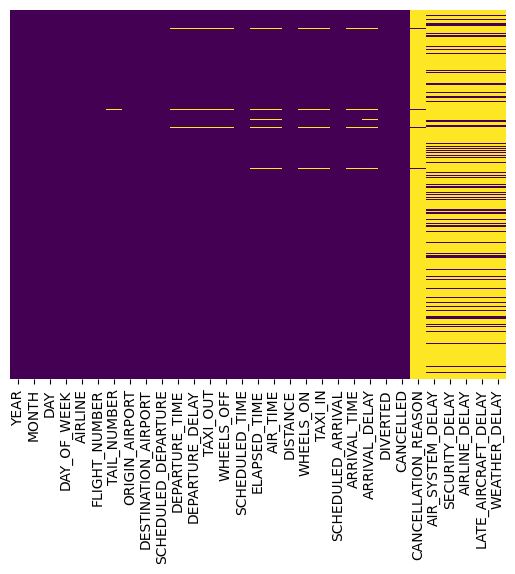

In [11]:

sns.heatmap(flights.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [228]:
flights.isnull().sum().sort_values(ascending=False)

CANCELLATION_REASON    49204
WEATHER_DELAY          40825
LATE_AIRCRAFT_DELAY    40825
AIRLINE_DELAY          40825
SECURITY_DELAY         40825
AIR_SYSTEM_DELAY       40825
AIR_TIME                 916
ARRIVAL_DELAY            916
ELAPSED_TIME             916
WHEELS_ON                812
TAXI_IN                  812
ARRIVAL_TIME             812
TAXI_OUT                 786
WHEELS_OFF               786
DEPARTURE_DELAY          763
DEPARTURE_TIME           763
TAIL_NUMBER              129
SCHEDULED_DEPARTURE        0
CANCELLED                  0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
SCHEDULED_ARRIVAL          0
DIVERTED                   0
ORIGIN_AIRPORT             0
DISTANCE                   0
DESTINATION_AIRPORT        0
MONTH                      0
SCHEDULED_TIME             0
YEAR                       0
dtype: int64

Filling NA in ['WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY'] with 0 since in these cases NA represents 0 

In [13]:
# Fill NA values in delay columns with 0
delay_cols = ['WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY']
flights[delay_cols] = flights[delay_cols].fillna(0)

Deleting Cancelation reason column beacuse is not relevant and droping rows with NA values

In [14]:
del flights['CANCELLATION_REASON']
flights = flights.dropna()
flights.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49038 entries, 1451127 to 1188862
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 49038 non-null  int64  
 1   MONTH                49038 non-null  int64  
 2   DAY                  49038 non-null  int64  
 3   DAY_OF_WEEK          49038 non-null  int64  
 4   AIRLINE              49038 non-null  object 
 5   FLIGHT_NUMBER        49038 non-null  int64  
 6   TAIL_NUMBER          49038 non-null  object 
 7   ORIGIN_AIRPORT       49038 non-null  object 
 8   DESTINATION_AIRPORT  49038 non-null  object 
 9   SCHEDULED_DEPARTURE  49038 non-null  int64  
 10  DEPARTURE_TIME       49038 non-null  float64
 11  DEPARTURE_DELAY      49038 non-null  float64
 12  TAXI_OUT             49038 non-null  float64
 13  WHEELS_OFF           49038 non-null  float64
 14  SCHEDULED_TIME       49038 non-null  float64
 15  ELAPSED_TIME         49038 n

Changing times to timestamp

In [17]:
from datetime import datetime, time

import math

def create_time_object(num: float) -> time:
    if math.isnan(num):  # Check if the input is NaN
        return None
    num = int(num)
    hour = num // 100
    minute = num % 100
    if hour < 0:
        hour = 0
    elif hour > 23:
        hour = 23
    return time(hour=hour, minute=minute)

In [18]:
flights['SCHEDULED_DEPARTURE_DT'] = flights['SCHEDULED_DEPARTURE'].apply(create_time_object)
flights['DEPARTURE_TIME_DT'] = flights['DEPARTURE_TIME'].apply(create_time_object)
flights['SCHEDULED_ARRIVAL_DT'] = flights['SCHEDULED_ARRIVAL'].apply(create_time_object)
flights['ARRIVAL_TIME_DT'] = flights['ARRIVAL_TIME'].apply(create_time_object)

C:\Users\akash\AppData\Local\Temp\ipykernel_21736\783083546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['SCHEDULED_DEPARTURE_DT'] = flights['SCHEDULED_DEPARTURE'].apply(create_time_object)
C:\Users\akash\AppData\Local\Temp\ipykernel_21736\783083546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['DEPARTURE_TIME_DT'] = flights['DEPARTURE_TIME'].apply(create_time_object)
C:\Users\akash\AppData\Local\Temp\ipykernel_21736\783083546.py:3: SettingWithCopyWarning: 
A value is trying to 

# EDA

Plotting differents graphs to better understand the data and answer the business questions

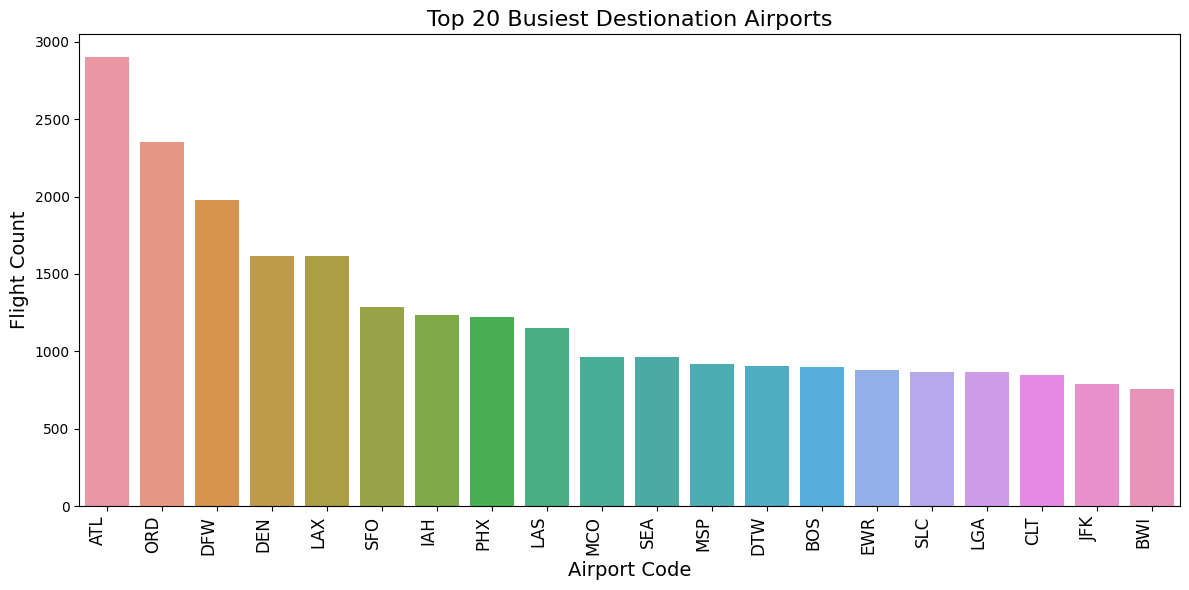

In [15]:

# Set color palette
sns.set_palette('Set2')

# Create count plot
plt.figure(figsize=(12, 6))
axis = sns.countplot(x=flights['DESTINATION_AIRPORT'], data=flights, order=flights['DESTINATION_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right", fontsize=12)

# Set title and axis labels
plt.title('Top 20 Busiest Destionation Airports', fontsize=16)
plt.xlabel('Airport Code', fontsize=14)
plt.ylabel('Flight Count', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_21736\528612076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights[delay_cols] = flights[delay_cols].fillna(0)


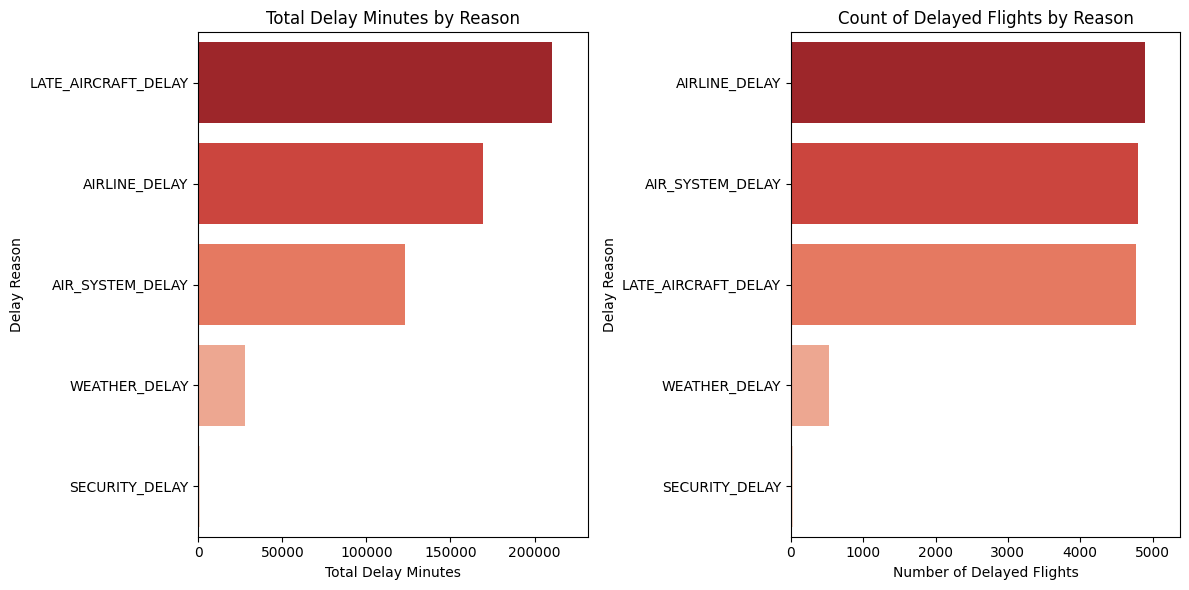

In [19]:


# Fill NA values in delay columns with 0
delay_cols = ['WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY']
flights[delay_cols] = flights[delay_cols].fillna(0)

# Calculate total delay for each delay reason
total_delay = flights[delay_cols].sum()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Create bar plot for total delay
total_delay_sorted = total_delay.sort_values(ascending=False)
sns.barplot(x=total_delay_sorted.values, y=total_delay_sorted.index, palette='Reds_r', ax=ax1)
ax1.set_title('Total Delay Minutes by Reason')
ax1.set_xlabel('Total Delay Minutes')
ax1.set_ylabel('Delay Reason')

# Create bar plot for count of delayed flights
delayed_flights = flights[flights[delay_cols].gt(0).any(axis=1)]
delay_counts = delayed_flights[delay_cols].gt(0).sum()
delay_counts_sorted = delay_counts.sort_values(ascending=False)
sns.barplot(x=delay_counts_sorted.values, y=delay_counts_sorted.index, palette='Reds_r', ax=ax2)
ax2.set_title('Count of Delayed Flights by Reason')
ax2.set_xlabel('Number of Delayed Flights')
ax2.set_ylabel('Delay Reason')


# Set axis limits to be the same for both plots
ax1.set_xlim(right=total_delay_sorted.max() * 1.1)
ax2.set_xlim(right=delay_counts_sorted.max() * 1.1)

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()


Classifiying the flights as DELAYED (1) if their ARRIVAL_DELAY > 15 minutes

C:\Users\akash\AppData\Local\Temp\ipykernel_21736\1987991498.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['DELAYED'] = result


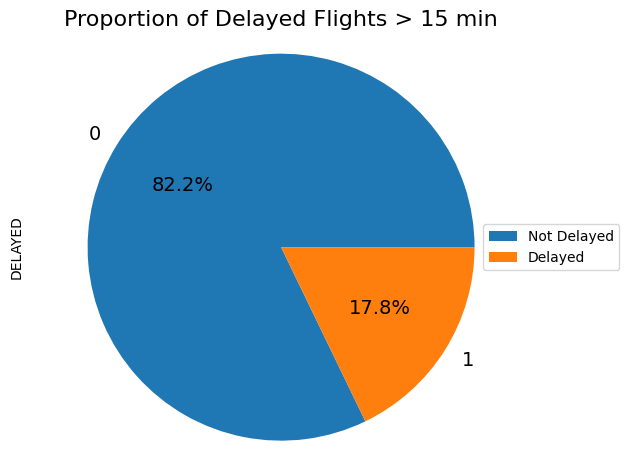

In [20]:
#FInding flights with dalys of 15 minutes or higher
result=[]
for row in flights['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0)  
        
flights['DELAYED'] = result
        


# Set color palette
colors = ['#1f77b4', '#ff7f0e']

# Create pie chart
flights['DELAYED'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%', fontsize=14)

# Set title and legend
plt.title('Proportion of Delayed Flights > 15 min', fontsize=16)
plt.legend(labels=['Not Delayed', 'Delayed'], loc="center right", bbox_to_anchor=(1.2, 0.5))

# Adjust layout
plt.axis('equal')
plt.tight_layout()

# Show plot
plt.show()


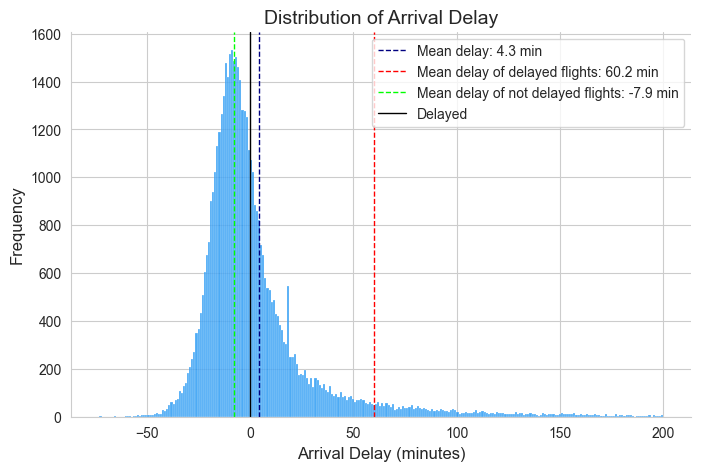

In [21]:


# Filter flights with delay of 200 min or less
df_filtered = flights[flights['ARRIVAL_DELAY'] <= 200]

# Set up the plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the histogram
sns.histplot(df_filtered['ARRIVAL_DELAY'], bins=270, kde=False, ax=ax, color='#2196f3', alpha=0.8)


# Add a vertical line for the mean
mean_delay = flights['ARRIVAL_DELAY'].mean()
ax.axvline(mean_delay, color='navy', linestyle='--', lw=1, label=f'Mean delay: {mean_delay:.1f} min')


# Add a vertical line for the mean
mean_delay = flights[flights['DELAYED']== 1]['ARRIVAL_DELAY'].mean()
ax.axvline(mean_delay, color='red', linestyle='--', lw=1, label=f'Mean delay of delayed flights: {mean_delay:.1f} min')

# Add a vertical line for the mean
mean_delay = flights[flights['DELAYED']== 0]['ARRIVAL_DELAY'].mean()
ax.axvline(mean_delay, color='lime', linestyle='--', lw=1, label=f'Mean delay of not delayed flights: {mean_delay:.1f} min')

# Add a vertical line for the mean
#mean_delay = df_filtered['ARRIVAL_DELAY'].mean()
ax.axvline(0, color='black', lw=1, label=f'Delayed')

# Add a legend and axis labels
ax.legend()
ax.set_xlabel('Arrival Delay (minutes)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Arrival Delay', fontsize=14)

# Remove the top and right spines
sns.despine(ax=ax, top=True, right=True)

plt.show()


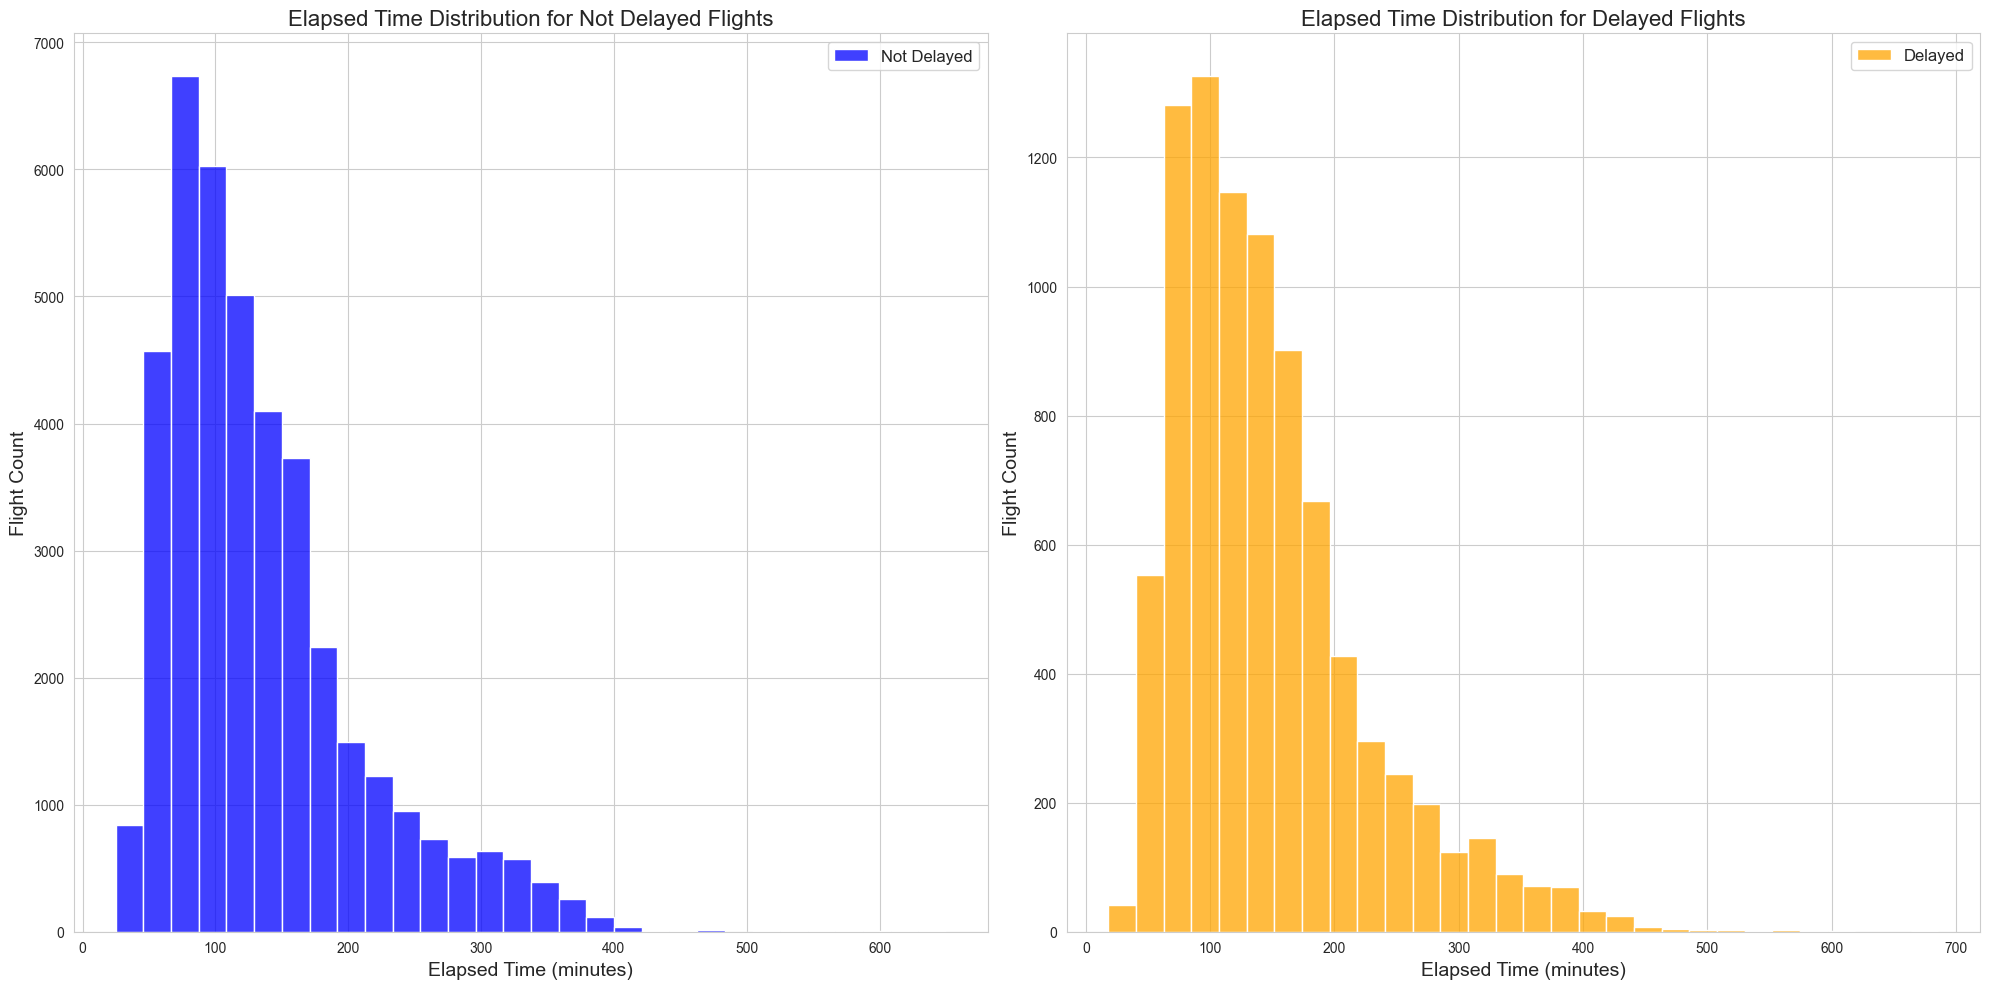

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette
sns.set_palette('Set2')

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot histogram of elapsed time for not delayed flights
sns.histplot(flights[flights['DELAYED']==0]['ELAPSED_TIME'].dropna(), bins=30, color='blue', ax=ax[0])
ax[0].set_title('Elapsed Time Distribution for Not Delayed Flights', fontsize=16)
ax[0].set_xlabel('Elapsed Time (minutes)', fontsize=14)
ax[0].set_ylabel('Flight Count', fontsize=14)

# Plot histogram of elapsed time for delayed flights
sns.histplot(flights[flights['DELAYED']==1]['ELAPSED_TIME'].dropna(), bins=30, color='orange', ax=ax[1])
ax[1].set_title('Elapsed Time Distribution for Delayed Flights', fontsize=16)
ax[1].set_xlabel('Elapsed Time (minutes)', fontsize=14)
ax[1].set_ylabel('Flight Count', fontsize=14)


# Add legend
ax[0].legend(['Not Delayed'], fontsize=12)
ax[1].legend(['Delayed'], fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


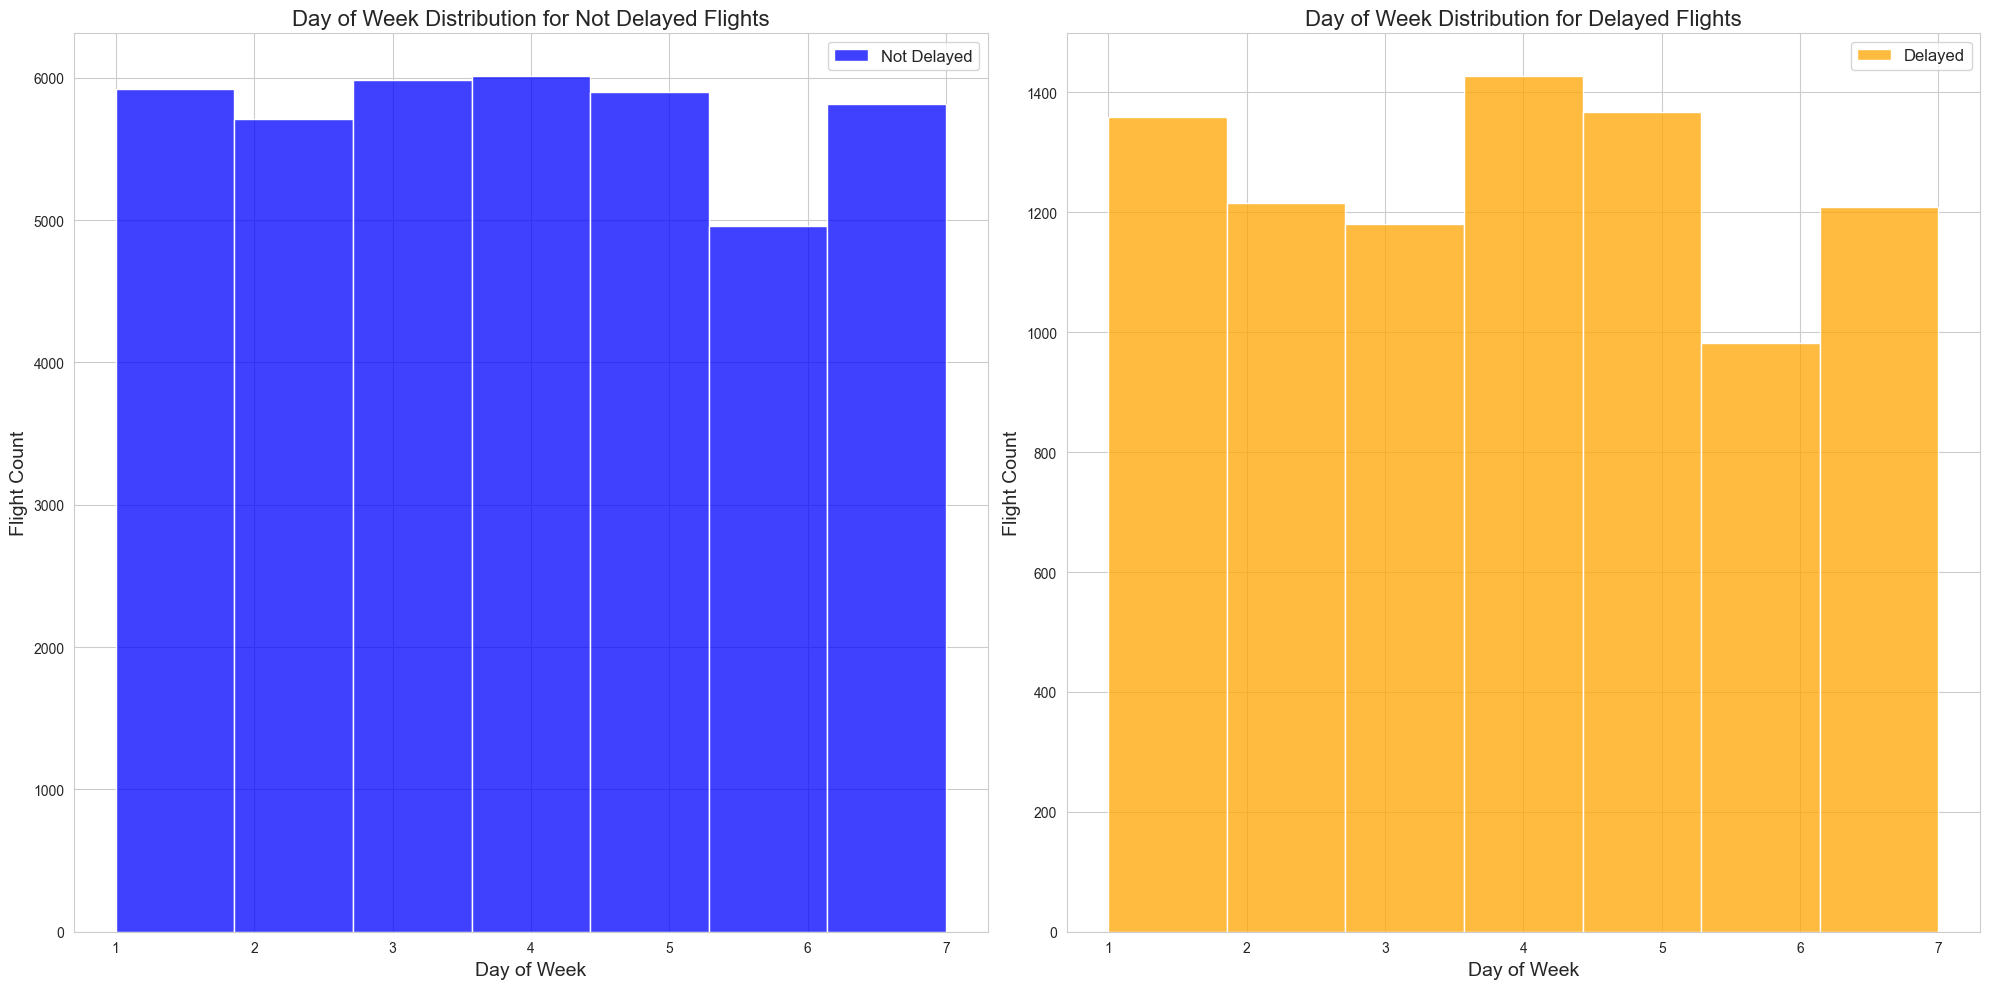

In [23]:
# Set color palette
sns.set_palette('Set2')

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot histogram of day of week for not delayed flights
sns.histplot(flights[flights['DELAYED']==0]['DAY_OF_WEEK'].dropna(), bins=7, color='blue', ax=ax[0])
ax[0].set_title('Day of Week Distribution for Not Delayed Flights', fontsize=16)
ax[0].set_xlabel('Day of Week', fontsize=14)
ax[0].set_ylabel('Flight Count', fontsize=14)

# Plot histogram of day of week for delayed flights
sns.histplot(flights[flights['DELAYED']==1]['DAY_OF_WEEK'].dropna(), bins=7, color='orange', ax=ax[1])
ax[1].set_title('Day of Week Distribution for Delayed Flights', fontsize=16)
ax[1].set_xlabel('Day of Week', fontsize=14)
ax[1].set_ylabel('Flight Count', fontsize=14)

# Add legend
ax[0].legend(['Not Delayed'], fontsize=12)
ax[1].legend(['Delayed'], fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

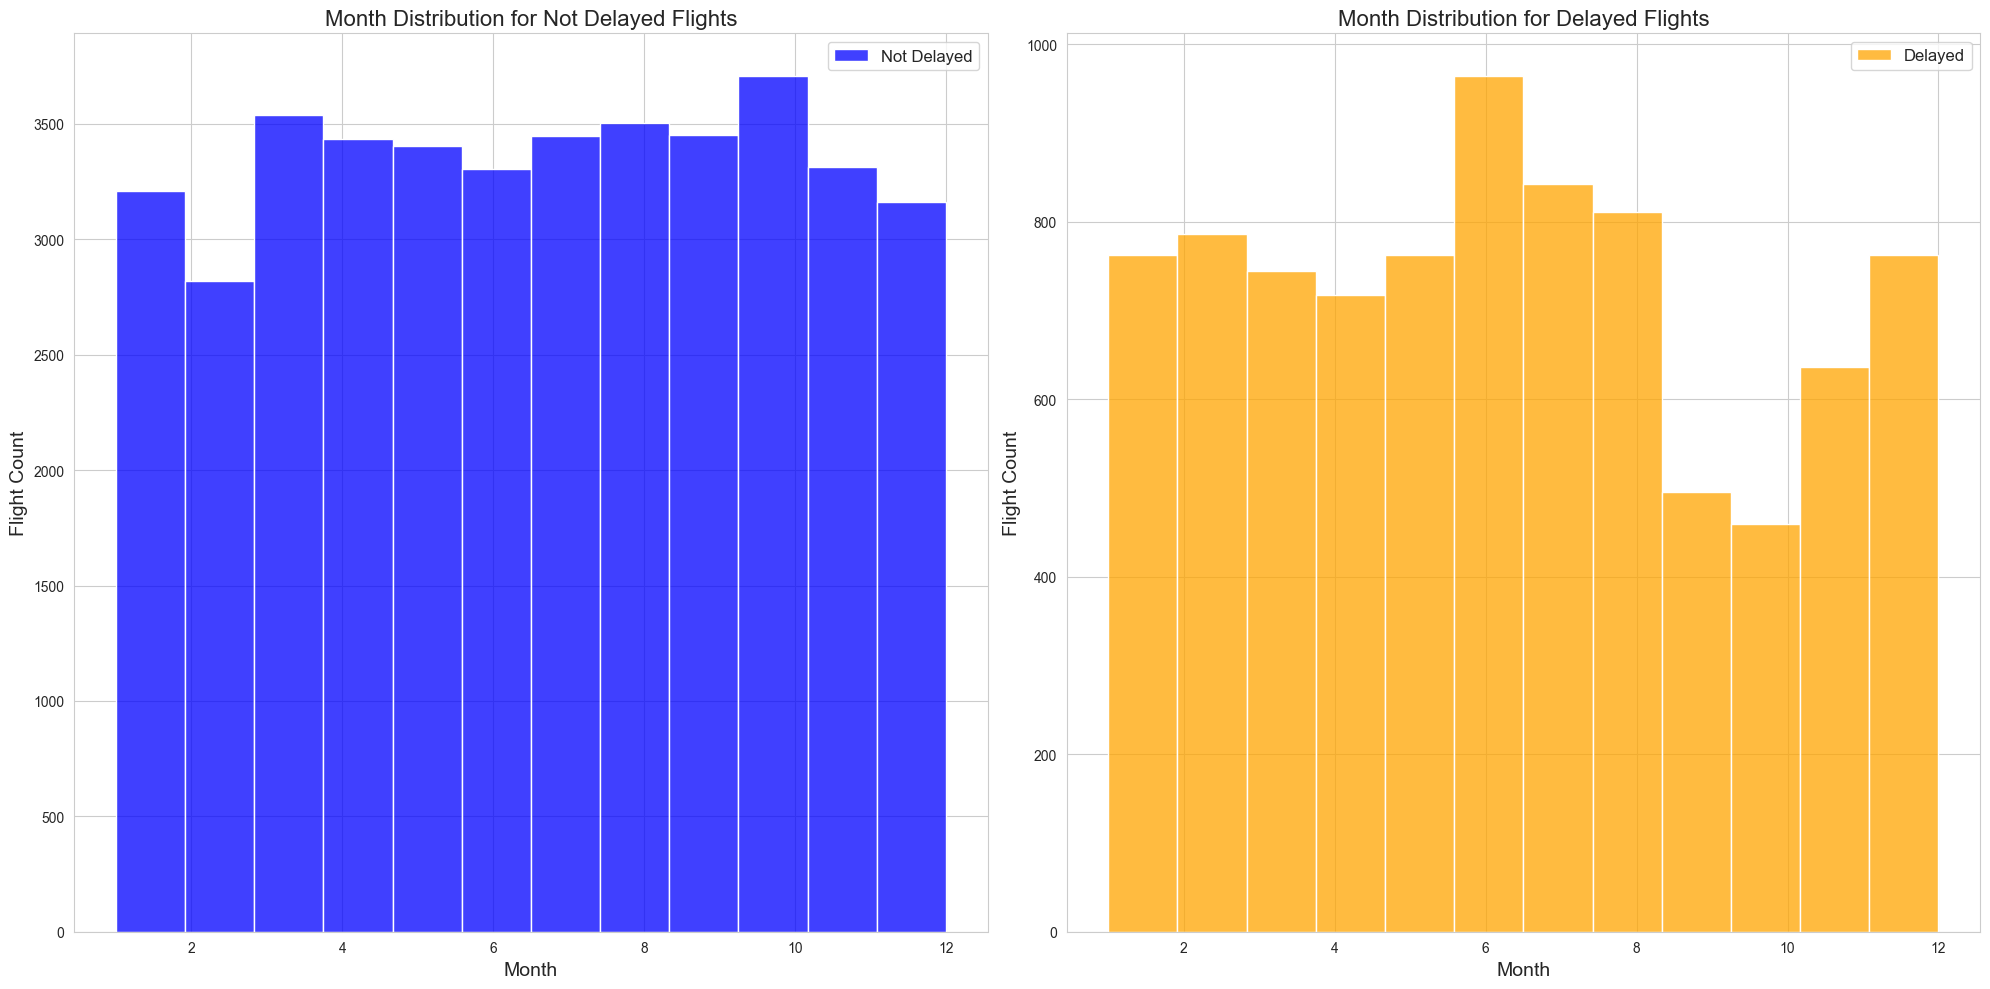

In [24]:
# Set color palette
sns.set_palette('Set2')

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot histogram of day of week for not delayed flights
sns.histplot(flights[flights['DELAYED']==0]['MONTH'].dropna(), bins=12, color='blue', ax=ax[0])
ax[0].set_title('Month Distribution for Not Delayed Flights', fontsize=16)
ax[0].set_xlabel('Month', fontsize=14)
ax[0].set_ylabel('Flight Count', fontsize=14)

# Plot histogram of day of week for delayed flights
sns.histplot(flights[flights['DELAYED']==1]['MONTH'].dropna(), bins=12, color='orange', ax=ax[1])
ax[1].set_title('Month Distribution for Delayed Flights', fontsize=16)
ax[1].set_xlabel('Month', fontsize=14)
ax[1].set_ylabel('Flight Count', fontsize=14)

# Add legend
ax[0].legend(['Not Delayed'], fontsize=12)
ax[1].legend(['Delayed'], fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

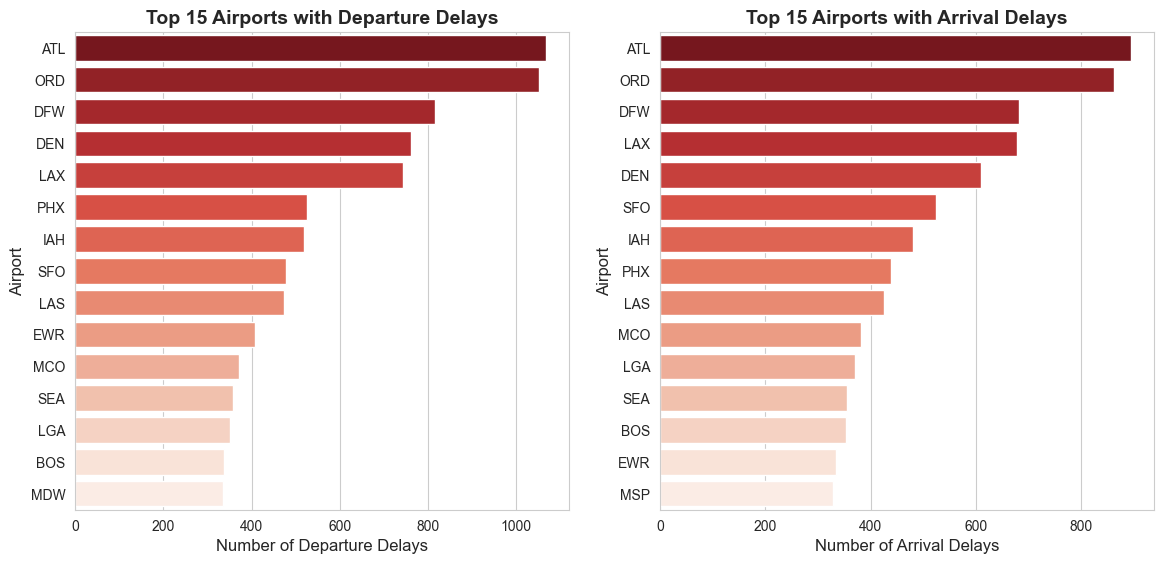

In [25]:

# Filter for delayed and on-time flights
departure_delay = flights[flights['DEPARTURE_DELAY'] > 0]
arrival_delay = flights[flights['ARRIVAL_DELAY'] > 0]

# Count delayed and on-time flights by airport
departure_delay = departure_delay['ORIGIN_AIRPORT'].value_counts().nlargest(15)
arrival_delay = arrival_delay['DESTINATION_AIRPORT'].value_counts().nlargest(15)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Create bar plot for departure delays
sns.barplot(x=departure_delay.values, y=departure_delay.index, palette='Reds_r', ax=ax1)
ax1.set_title('Top 15 Airports with Departure Delays', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Departure Delays', fontsize=12)
ax1.set_ylabel('Airport', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=10)

# Create bar plot for arrival delays
sns.barplot(x=arrival_delay.values, y=arrival_delay.index, palette='Reds_r', ax=ax2)
ax2.set_title('Top 15 Airports with Arrival Delays', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Arrival Delays', fontsize=12)
ax2.set_ylabel('Airport', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=10)

# Adjust layout
fig.tight_layout(pad=2)

# Show plot
plt.show()

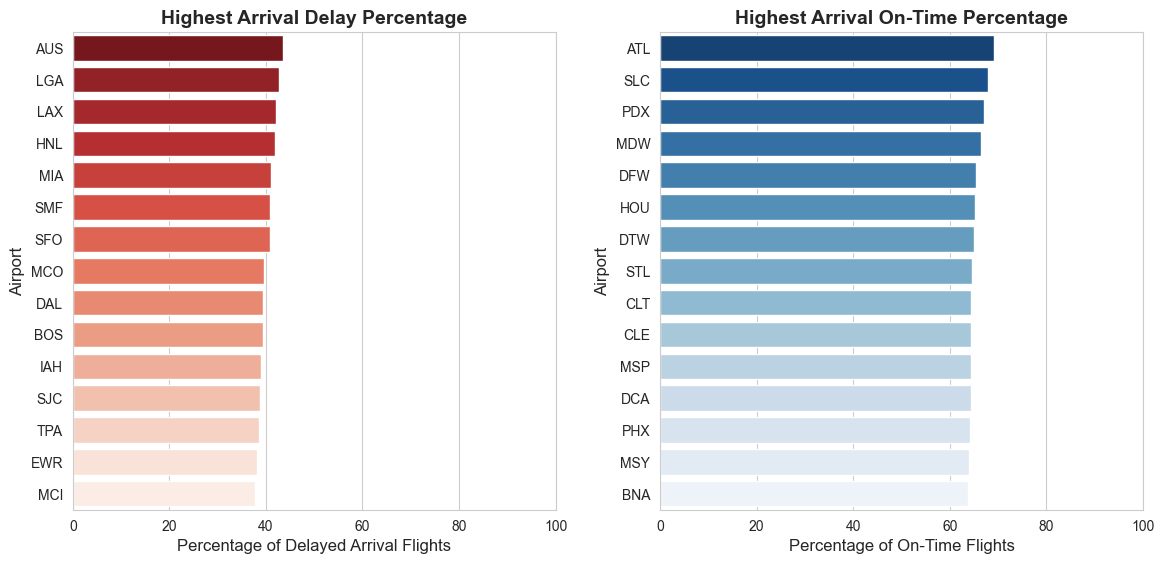

In [46]:


# Calculate percentage of delayed flights by airport
total_flights = flights.groupby('DESTINATION_AIRPORT').size()
total_flights = total_flights[total_flights > 300]
delayed_flights = flights[flights['ARRIVAL_DELAY'] > 0].groupby('DESTINATION_AIRPORT').size().reindex(total_flights.index, fill_value=0)
delay_percent = ((delayed_flights / total_flights) * 100).sort_values().nlargest(15)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Create bar plot for departure delays
sns.barplot(x=delay_percent.values, y=delay_percent.index, palette='Reds_r', ax=ax1)
ax1.set_title('Highest Arrival Delay Percentage', fontsize=14, fontweight='bold')
ax1.set_xlabel('Percentage of Delayed Arrival Flights', fontsize=12)
ax1.set_ylabel('Airport', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_xlim([0, 100])

# Calculate percentage of on-time flights by airport
ontime_flights = total_flights - delayed_flights
ontime_percent = ((ontime_flights / total_flights) * 100).sort_values().nlargest(15)

# Create bar plot for on-time flights
sns.barplot(x=ontime_percent.values, y=ontime_percent.index, palette='Blues_r', ax=ax2)
ax2.set_title('Highest Arrival On-Time Percentage', fontsize=14, fontweight='bold')
ax2.set_xlabel('Percentage of On-Time Flights', fontsize=12)
ax2.set_ylabel('Airport', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_xlim([0, 100])

# Adjust layout
fig.tight_layout(pad=2)

# Show plot
plt.show()


Clissifing the flight times in Late Night, Morning, Afternoon, Evening and Late Night based on their Schedule Departure

In [29]:
# Assuming flights is a pandas DataFrame with a column 'SCHEDULED_DEPARTURE' of datetime.time type
flights['SCHEDULED_DEPARTURE_DT'] = pd.to_datetime(flights['SCHEDULED_DEPARTURE_DT'], format='%H:%M:%S').dt.time

# Define time intervals for classification
intervals = [(pd.to_datetime('00:00:00', format='%H:%M:%S').time(), pd.to_datetime('04:59:59', format='%H:%M:%S').time(), 'Late Night'),
             (pd.to_datetime('05:00:00', format='%H:%M:%S').time(), pd.to_datetime('10:59:59', format='%H:%M:%S').time(), 'Morning'),
             (pd.to_datetime('11:00:00', format='%H:%M:%S').time(), pd.to_datetime('16:59:59', format='%H:%M:%S').time(), 'Afternoon'),
             (pd.to_datetime('17:00:00', format='%H:%M:%S').time(), pd.to_datetime('20:59:59', format='%H:%M:%S').time(), 'Evening'),
             (pd.to_datetime('21:00:00', format='%H:%M:%S').time(), pd.to_datetime('23:59:59', format='%H:%M:%S').time(), 'Late Evening')]

# Classify flights based on departure time
flights['DEPARTURE_TIME_CATEGORY'] = ''
for i, row in flights.iterrows():
    for interval in intervals:
        if interval[0] <= row['SCHEDULED_DEPARTURE_DT'] <= interval[1]:
            flights.at[i, 'DEPARTURE_TIME_CATEGORY'] = interval[2]
            break


flights['SCHEDULED_DEPARTURE_HOUR'] = flights['SCHEDULED_DEPARTURE_DT'].apply(lambda x: x.hour)
flights['SCHEDULED_DEPARTURE_HOUR'] = flights['SCHEDULED_DEPARTURE_HOUR'].astype(int)


C:\Users\akash\AppData\Local\Temp\ipykernel_21736\998015846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['SCHEDULED_DEPARTURE_DT'] = pd.to_datetime(flights['SCHEDULED_DEPARTURE_DT'], format='%H:%M:%S').dt.time
C:\Users\akash\AppData\Local\Temp\ipykernel_21736\998015846.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['DEPARTURE_TIME_CATEGORY'] = ''
C:\Users\akash\AppData\Local\Temp\ipykernel_21736\998015846.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

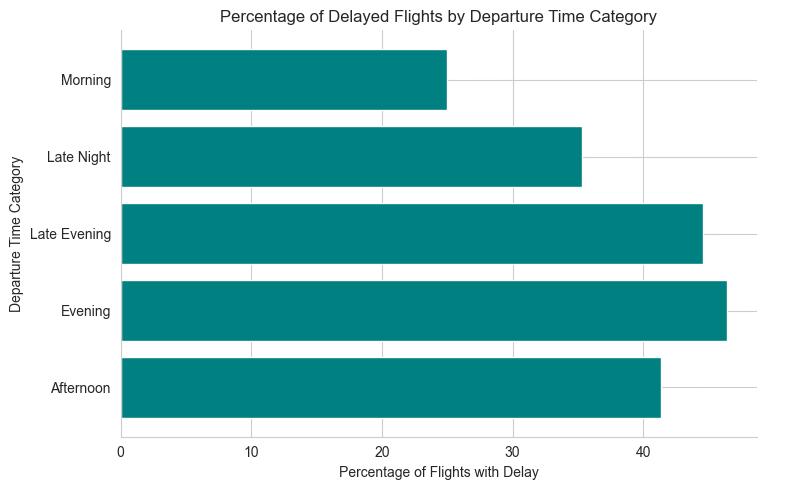

In [30]:
# Calculate percentage of flights with departure delay > 0 for each category
delay_perc = flights.groupby('DEPARTURE_TIME_CATEGORY')['DEPARTURE_DELAY'].apply(lambda x: (x > 0).mean() * 100)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(delay_perc.index, delay_perc.values, color='teal')

# Set axis labels and title
ax.set_xlabel('Percentage of Flights with Delay')
ax.set_ylabel('Departure Time Category')
ax.set_title('Percentage of Delayed Flights by Departure Time Category')

# Add value labels to the bars
for i, v in enumerate(delay_perc.values):
    ax.text(v + 1, i, f'{v:.1f}%', color='white', fontweight='bold')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_21736\2693443376.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = flights.corr()


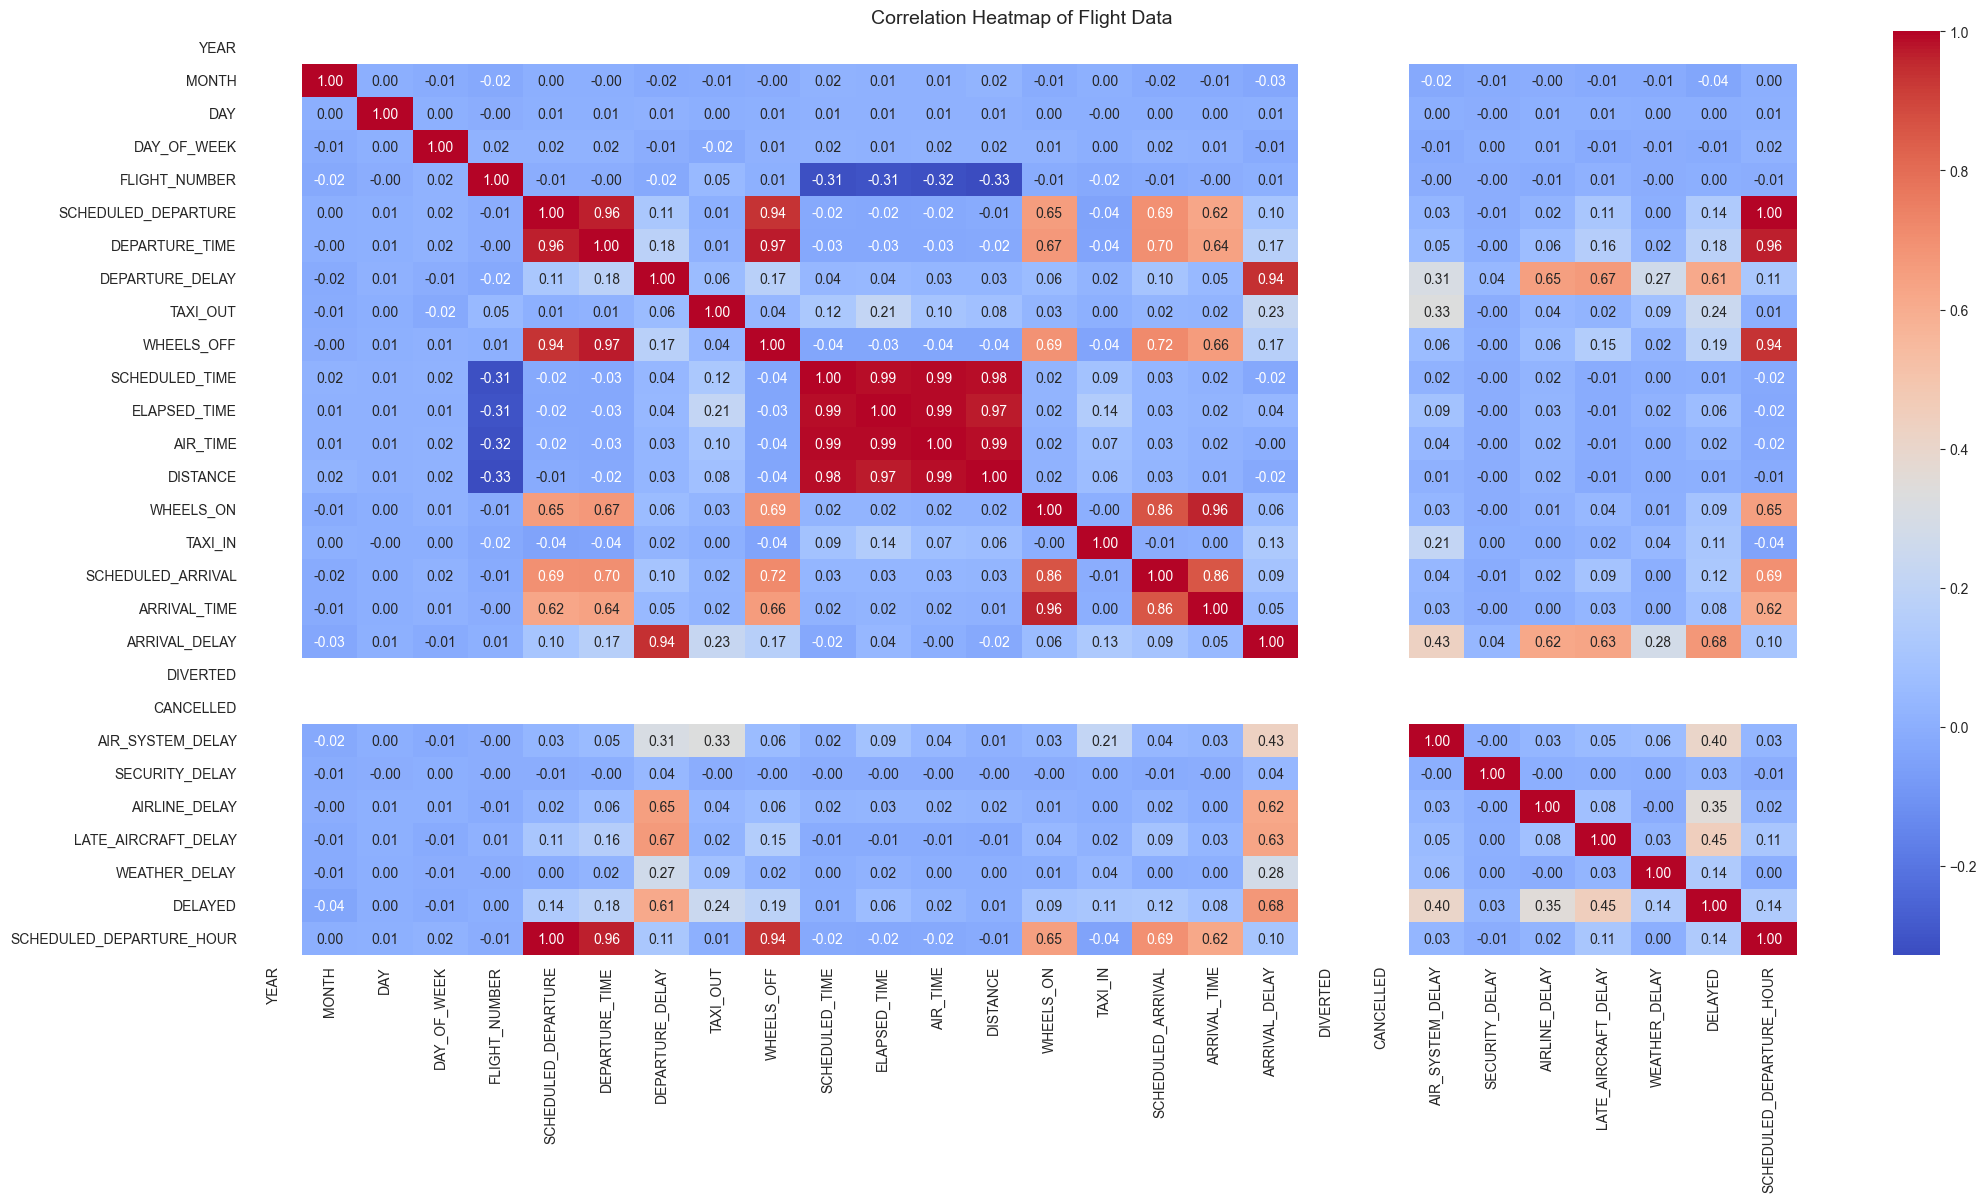

In [31]:
# Compute correlation matrix
corr = flights.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(25, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)
plt.title('Correlation Heatmap of Flight Data', fontsize=14)
plt.show()

# Prediction if a flight will be Delayed (15 minutes) or not 

In [245]:
flights['DELAYED'].value_counts()

0    40264
1     8820
Name: DELAYED, dtype: int64

Selecting relevant fields

In [33]:
df_columns = ['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DELAYED']

df = flights[df_columns]


Splitting Data

In [34]:
df_values = df.values
X, y = df_values[:,:-1], df_values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



Scaling Data

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

scaled_features = StandardScaler().fit_transform(X_train, X_test)

Fiting Model - Decision Tree Classifier Model

In [36]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

Using Model for Preditions

In [37]:
pred = clf.predict_proba(X_test)

Evaluation Model Performance

In [39]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, pred[:,1])
print('AUC Score of Model is: {} %'.format(round(auc_score*100,2)))

AUC Score of Model is: 99.38 %


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = confusion_matrix(y_test, pred[:,1])
print("Confusion Matrix:")
print(result1)
print('')
result2 = classification_report(y_test, pred[:,1])
print("Classification Report:",)
print (result2)
result3 = accuracy_score(y_test,pred[:,1])
print("Accuracy:",result3)

Confusion Matrix:
[[8073   15]
 [  18 1702]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8088
         1.0       0.99      0.99      0.99      1720

    accuracy                           1.00      9808
   macro avg       0.99      0.99      0.99      9808
weighted avg       1.00      1.00      1.00      9808

Accuracy: 0.9966353996737357


Text(0.5, 427.9555555555555, 'Predicted label')

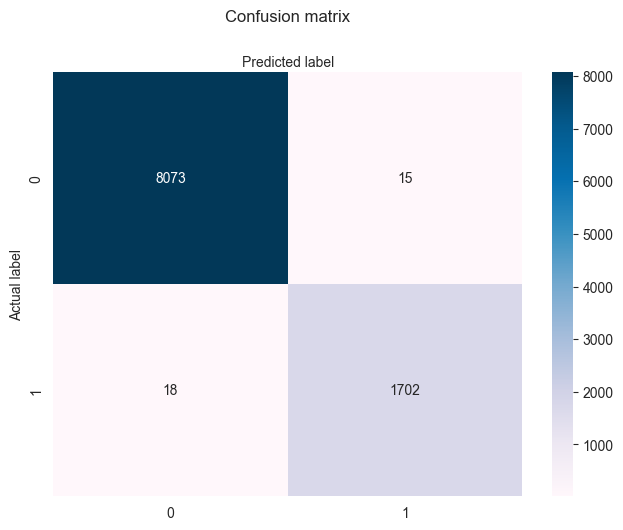

In [41]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(result1), annot=True, cmap="PuBu" ,fmt='g')## visualized confusion matrix using heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:

print("Accuracy Achieved:",round(metrics.accuracy_score(y_test, pred[:,1])*100,2),'%')
print(' ')
print("Precision Achieved:",round(metrics.precision_score(y_test, pred[:,1])*100,2),'%')
print(' ')
print("Recall Achieved:",round(metrics.recall_score(y_test, pred[:,1])*100,2),'%')

Accuracy Achieved: 99.66 %
 
Precision Achieved: 99.13 %
 
Recall Achieved: 98.95 %


# Conclusion


Delayed flights are a significant problem in the US aviation industry, causing inconvenience and frustration for passengers and incurring costs for airlines and other stakeholders.

- Our analysis of flight delay data has identified two primary causes of delays: late aircrafts and airline-related delays.

- Late aircrafts, which occur when the incoming aircraft for a flight is delayed, are the most common cause of delays in the US.

- Airline-related delays, which include factors such as crew scheduling, maintenance, and other operational issues, are the second most common cause of delays.

- Other factors that contribute to flight delays include weather, air traffic control, security, and other issues.

- The data also shows that some airlines are more prone to delays than others, and that delays tend to be more common during certain times of day and certain months of the year.

Based on our findings, we recommend that airlines and other stakeholders in the US aviation industry focus on strategies to improve aircraft turnaround times, optimize crew and maintenance schedules, and address other operational issues that contribute to delays.

By working together to address the root causes of delays, we can help reduce the impact of delayed flights on passengers, airlines, and the economy as a whole.

# Using a Delay Prediction Model to Reduce Delay Times

A delay prediction model can be a powerful tool for improving the on-time performance of flights and reducing the impact of delays on passengers and airlines. Here are some ways in which a delay prediction model can be used to improve the situation:

- Preemptive rebooking: Airlines can use a delay prediction model to anticipate delays before they occur and proactively rebook passengers on alternative flights to minimize the impact of delays.

- Resource allocation: By predicting delays in advance, airlines can adjust crew schedules, gate assignments, and other resources to minimize the impact of delays on passengers and maintain a smooth operation.

- Operational optimization: Delay prediction models can be used to identify patterns and root causes of delays, which can help airlines optimize their operations and improve on-time performance.

- Customer communication: With accurate delay predictions, airlines can provide passengers with real-time information about delays, including estimated departure times, alternate flight options, and other useful information to reduce passenger frustration.

- Continuous improvement: By analyzing delay data and continuously improving the delay prediction model, airlines can achieve better accuracy and reduce the number of delays over time.

Overall, a delay prediction model can be a powerful tool for airlines to improve their operations and reduce the impact of delays on passengers. By using this model to anticipate and manage delays more effectively, airlines can improve customer satisfaction and reduce costs associated with delays.